# HR Data Analysis

## Introduction
The following dataset contains employee profile data such as satisfaction level at the company, evaluation scores, the department in which they work, and whether the employee left the company, among other variables. I stumbled upon this dataset on Kaggle and thought it would be interesting to explore from a business perspective. For example, if a Human Resources department wanted to examine the general contentment of the company employees and determine if any changes to policies needed to be made. 

## Dataset 
The dataset can be found at the following link: https://www.kaggle.com/jacksonchou/hr-data-for-analytics.
The data being measured are as follows:
- **Satisfaction level**: a value between 0 and 1 that measures the satisfaction level of the employee
- **Last evaluation**: the score of the employee's last evaluation from an employee review
- **Number of projects**: number of projects the employee has worked on while at the company
- **Average monthly hours**: average hours of work per month
- **Time spent at company**: number of years employee has been at the company
- **Work accident**: binary value denoting whether the employee has been in a work accident
- **Left**: binary value denoting whether the employee has left the company
- **Promotion** last 5 years: binary value denoting whether the employee has received a promotion in the last 5 years
- **Sales**: department that the employee works in
- **Salary**: measurement of the employee's salary (low, medium, high)

Some questions I'm interested in exploring: 
- What variables affect satisfaction level the most? What factors affect the decision to leave the most?
- What department sees the highest rate of dissatisfied employees (employees who end up leaving)?
- What would you recommend the company change to help with employee retention?


## Exploratory Data Analysis

In [1]:
# import necessary libraries
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import chi2_contingency
import warnings
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/michealalexander/Desktop/HR Analytics/HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'department'}, inplace=True)

In [7]:
# work accident, left, promotion_last_5years, department, and salary variables should not be integers or objects
# but categories

categorical_vars = ['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']
for category in categorical_vars:
    df[category] = df[category].astype('category')

In [8]:
df['salary'].unique()

['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']

In [9]:
df['department'].unique()

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
Categories (10, object): ['IT', 'RandD', 'accounting', 'hr', ..., 'product_mng', 'sales', 'support', 'technical']

### Check for duplicate and null entries

In [10]:
# check to see if there are duplicate rows in the data
duplicate_rows_df = df[df.duplicated(keep='first')]

In [11]:
print('Number of duplicated rows: ', duplicate_rows_df.shape[0])

Number of duplicated rows:  3008


In [12]:
duplicate_rows_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(11991, 10)

In [15]:
# check for NA values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check for outliers

Boxplot of satisfaction_level


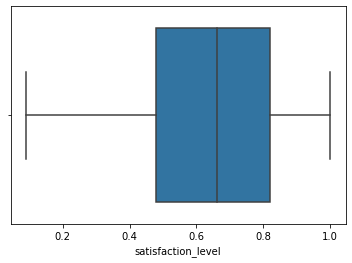

Boxplot of last_evaluation


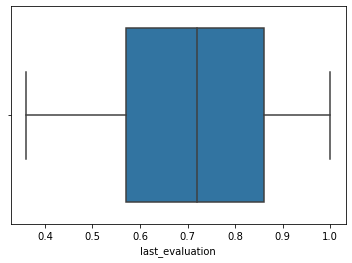

Boxplot of number_project


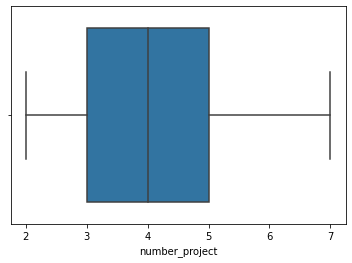

Boxplot of average_monthly_hours


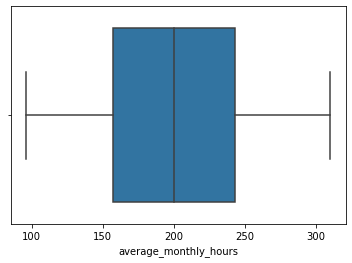

Boxplot of time_spend_company


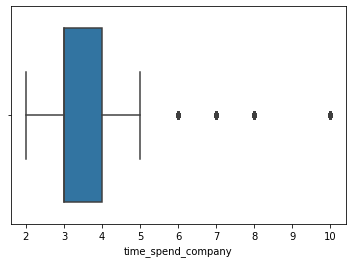

In [16]:
# check for any outliers that might need to be removed for modeling
numerical_variables = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']
for column in numerical_variables:
    print('Boxplot of', str(column))
    sns.boxplot(df[column])
    plt.show()

It appears that the only variable with outliers is the amount of time spent at the company. The 3rd quartile value is 4 while the maximum in the data is 10. Using the equation Q1 - 1.5(IQR) and Q3 + 1.5(IQR), we know that any values of time spent in the company below 1.5 (there are none) and above 5.5 are considered outliers. 

Also, the average number of work hours for an employee is extremely high at this company; the average amount for all employees is 201.050337 the 1st quartile is ~160 hours which is what we would expect to be the monthly work hours for an employee who works 40 hours a week.

In [17]:
# what department works the most (has the highest average work hours)?
pd.DataFrame(df.groupby('department').average_monthly_hours.mean()).sort_values(by='average_monthly_hours', ascending=False)

,average_monthly_hours
department,
management,201.529817
RandD,201.291066
technical,201.115419
accounting,200.877617
IT,200.638320
support,200.627128
sales,200.242050
marketing,199.487370
hr,199.371048


All departments seem to work about the same amount.

### Examine the Distributions of the numerical variables

Distribution of: satisfaction_level


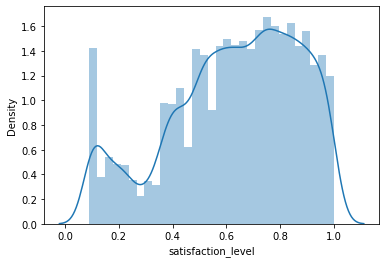

Distribution of: last_evaluation


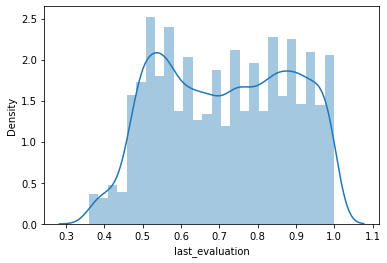

Distribution of: number_project


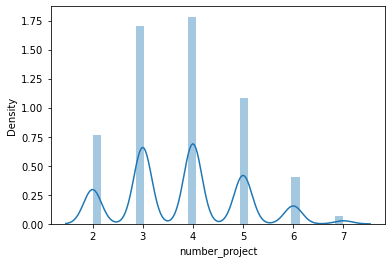

Distribution of: average_monthly_hours


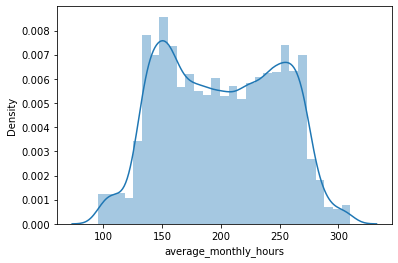

Distribution of: time_spend_company


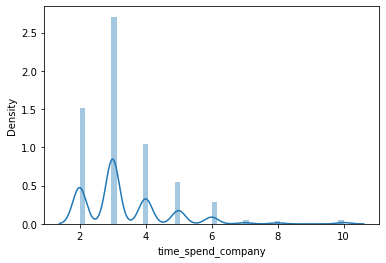

In [18]:
# check the distributions for each of the numerical variables
for i in numerical_variables: 
    print('Distribution of:', str(i))
    sns.distplot(df[i])
    #plt.xticks(rotation=45)
    plt.show()

None of the numerical variables are normally distributed; previous evaluataion scores and average monthly hours appear to be bimodal distributions while satisfaction levels are skewed left.

### Correlation between numerical variables

<AxesSubplot:>

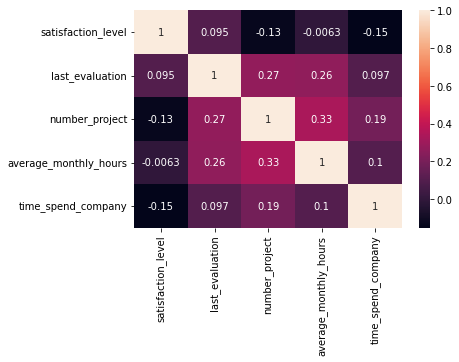

In [19]:
sns.heatmap(df.corr(), annot = True)

It looks like there is not a strong correlation between any of the numerical variables. With respect to satisfaction level, there is not a significant positive or negative correlation with the other variables.

### Categorical Variable counts

I'm also interested in investigating the relationship between the categorical variables:

Counts of: Work_accident


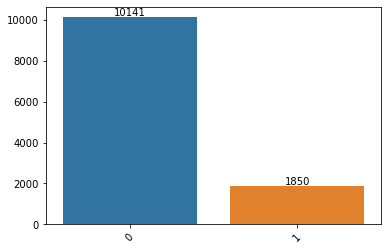

Counts of: left


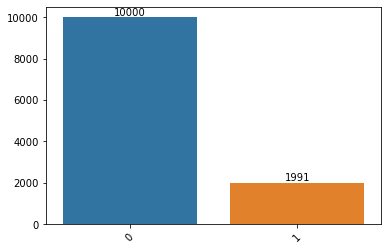

Counts of: promotion_last_5years


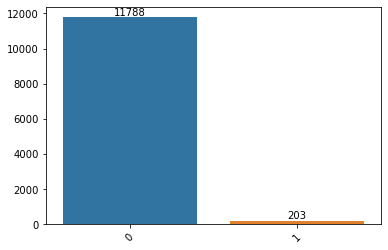

Counts of: department


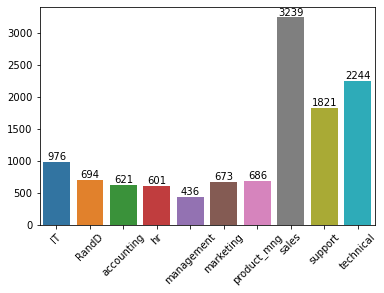

Counts of: salary


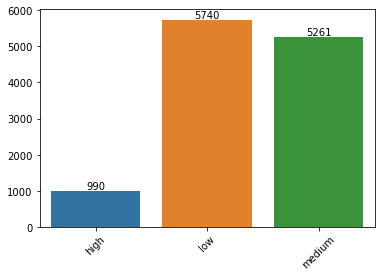

In [20]:
# check the counts for certain categorical variables
columns = df.columns
for i in columns:
    if i not in numerical_variables:
        print('Counts of:', i)
        ax = sns.barplot(x = df[i].value_counts().index, y = df[i].value_counts().values)
        ax.bar_label(ax.containers[0])
        plt.xticks(rotation=45)
        plt.show()

In [21]:
employee_retention = (10000)/(10000+1991)
print('Employee retention at this company is: {}%'.format(round(employee_retention*100, 2)))

Employee retention at this company is: 83.4%


In [22]:
# calculate the number of people who left in each department
pd.crosstab(df.department, df.left).sort_values(by=1, ascending=False)

left,0,1
department,,
sales,2689,550
technical,1854,390
support,1509,312
IT,818,158
hr,488,113
marketing,561,112
product_mng,576,110
accounting,512,109
RandD,609,85


If there was no significant difference between the departments and whether someone chooses to leave, we would expect the number of people who leave in each department to be proportional to the size of the department. However, this is only the case for the first 4 departments (sales, technical, support and IT) which are the largest departments. We would expect R&D to have the next highest number of employees who leave but it is actually Human Resources, which has the second lowest number of employees after management. This poses the question, why are so many people leaving the HR department? I will investigate whether leaving and the department one works in are significantly dependent on each other further down.

In [23]:
# create a dataframe of just employees who have left the company
left_df = df[df['left'] == 1]
left_df.shape

(1991, 10)

In [24]:
# calculate the percentage of employees that have left each department 
sector_counts = df['department'].value_counts() # total people in each department
sector_left_counts = left_df['department'].value_counts() # number of people who left in each department
ratios = round(sector_left_counts/sector_counts, 3)
pd.DataFrame(ratios).sort_values(by='department', ascending=False)

,department
hr,0.188
accounting,0.176
technical,0.174
support,0.171
sales,0.170
marketing,0.166
IT,0.162
product_mng,0.160
RandD,0.122
management,0.119


The Human Resources department has the highest percentage of employees who leave relative to the size of the department. Management has the lowest departure rate which is not unexpected. However it is worth noting that R&D has the second lowest departure rate, just slightly more than management.

Now let's look at some of the differences between the departments:

In [25]:
# checking averages of variables based on department
df.groupby(['department']).mean().sort_values(by='satisfaction_level', ascending=False)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
department,,,,,
support,0.634822,0.722998,3.820977,200.627128,3.292696
marketing,0.634770,0.718440,3.720654,199.487370,3.421991
IT,0.634016,0.715051,3.797131,200.638320,3.350410
management,0.631995,0.726307,3.837156,201.529817,3.981651
sales,0.631349,0.710398,3.777092,200.242050,3.380673
product_mng,0.629825,0.713790,3.794461,198.893586,3.341108
technical,0.627937,0.719791,3.859180,201.115419,3.309269
RandD,0.627176,0.712983,3.850144,201.291066,3.319885
hr,0.621947,0.715691,3.675541,199.371048,3.256240


The satisfaction levels are all quite close (only a difference of 3% between the highest and lowest values). Satisfaction is highest in support but lowest in accounting. 

In [26]:
pd.crosstab(df.department, df.Work_accident)

Work_accident,0,1
department,,
IT,837,139
RandD,575,119
accounting,534,87
hr,521,80
management,364,72
marketing,565,108
product_mng,577,109
sales,2741,498
support,1522,299


In [27]:
pd.crosstab(df.department, df.promotion_last_5years)

promotion_last_5years,0,1
department,,
IT,974,2
RandD,673,21
accounting,611,10
hr,590,11
management,400,36
marketing,646,27
product_mng,686,0
sales,3181,58
support,1805,16


Surprisingly, no one from product management and only 2 people from IT (which is the fourth largest department) have received promotions in the last 5 years. I would also recommend looking into the reasoning behind this.

Some general statistics about people who leave (note that direct comparisons can't be made with extreme confidence since the number of people who left is about 20% the size of the number of people who stayed):

In [28]:
df.groupby(['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
left,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000
1,0.440271,0.721783,3.883476,208.16223,3.881467


These averages make sense; satisfaction levels are very low among people who left. Also people who leave worked on slightly more projects, worked more hours, and were at the company longer on average. Interestingly, previous evaluation scores were slightly higher for people who left compared to those who stayed (perhaps this is related to a lack of promotions?). 

However, I don't know if any of these differences are significant, so I will use a t-test at significance level 0.05 to determine this. 

In [29]:
for i in numerical_variables:
    stat, p = stats.ttest_ind(df[i][df['left'] == 0], df[i][df['left'] == 1])
    if p < 0.05:
        print('There is a statistically significant difference in {} between employees who left and employees who stayed (t-statistic = {}, p= {}).\n'.format(i, stat, p))
    if p > 0.05:
        print('There is not a statistically significant difference in {} between employees who left and employees who stayed (t-statistic = {}, p= {}).\n'.format(i, stat, p))

There is a statistically significant difference in satisfaction_level between employees who left and employees who stayed (t-statistic = 40.98502015841721, p= 0.0).

There is not a statistically significant difference in last_evaluation between employees who left and employees who stayed (t-statistic = -1.480487450460807, p= 0.13876948482810622).

There is a statistically significant difference in number_project between employees who left and employees who stayed (t-statistic = -3.3880208345839424, p= 0.0007062542110999653).

There is a statistically significant difference in average_monthly_hours between employees who left and employees who stayed (t-statistic = -7.7286004860688795, p= 1.1739390712865618e-14).

There is a statistically significant difference in time_spend_company between employees who left and employees who stayed (t-statistic = -19.266329594172518, p= 1.745810653156104e-81).



There was a statistically significant difference in satisfaction level, number of projects, average monthly work hours, and time spent at the company between employeess who left and who stayed.

In [30]:
df.groupby(['left', 'promotion_last_5years']).mean()
# people who left and weren't promoted worked on the most projects and worked more hours than their counterparts 
# (on average)

satisfaction_level  last_evaluation  \
left promotion_last_5years                                        
0    0                                0.667250         0.715754   
     1                                0.673128         0.711282   
1    0                                0.440061         0.722219   
     1                                0.492500         0.613750   

                            number_project  average_monthly_hours  \
left promotion_last_5years                                          
0    0                            3.785926             198.932585   
     1                            3.830769             199.451282   
1    0                            3.887040             208.281392   
     1                            3.000000             178.625000   

                            time_spend_company  
left promotion_last_5years                      
0    0                                3.248037  
     1                                3.964103  
1    0                                3.883510  
     1                                3.375000

People who left and were not promoted worked on the most projects and had higher monthly average work hours.

Now I would like to look at some of the relationships between the categorical variables using chi-square test of independence. Particularly of interest will be whether any of the categorical variables are significantly associated with whether the employee left. H(0) will be that the two variables are independent of each other; a p-value of less than 0.05 will be sufficient evidence to allow us to reject the null hypothesis.

### Chi-Square Tests for significance between categorical variables

In [31]:
chi2_contingency(pd.crosstab(df.department, df.Work_accident))

(7.905690953130524,
 0.5436776070238778,
 9,
 array([[ 825.42039863,  150.57960137],
        [ 586.92802936,  107.07197064],
        [ 525.19064298,   95.80935702],
        [ 508.27629055,   92.72370945],
        [ 368.732883  ,   67.267117  ],
        [ 569.1679593 ,  103.8320407 ],
        [ 580.16228838,  105.83771162],
        [2739.2793762 ,  499.7206238 ],
        [1540.05178884,  280.94821116],
        [1897.79034276,  346.20965724]]))

Department and work accident appear to be independent from each other because the p-value is equal to 0.5436776070238778 and so we accept the null hypothesis.

In [32]:
chi2_contingency(pd.crosstab(df.department, df.promotion_last_5years))

(181.2075023491875,
 2.8351225375507266e-34,
 9,
 array([[ 959.47694104,   16.52305896],
        [ 682.2510216 ,   11.7489784 ],
        [ 610.48686515,   10.51313485],
        [ 590.82545242,   10.17454758],
        [ 428.61879743,    7.38120257],
        [ 661.60653824,   11.39346176],
        [ 674.38645651,   11.61354349],
        [3184.16579101,   54.83420899],
        [1790.17162872,   30.82837128],
        [2206.01050788,   37.98949212]]))

However, the department the employee works in and whether the employee received a promotion in the last 5 years are actually dependent on each other, since the p-value is less than 0.05 (2.8351225375507266e-34); we reject the null hypothesis.  

Now I will look at the relationship between the categorical variables with the 'left' variable:

In [33]:
# check significance of variables with 'left'
for i in categorical_vars:
    if i != 'left':
        p_value = chi2_contingency(pd.crosstab(df[i], df['left']))[1]
        if p_value < 0.05:
            print('Because the p-value {} is less than 0.05, we can reject the null hypothesis and conclude that {} and {} are significantly associated.\n'.format(p_value, i, 'whether the employee left'))
        else:
            print('Because the p-value {} is greater than 0.05, we accept the null hypothesis and conclude that {} and {} are not significantly associated.\n'.format(p_value, i, 'whether the employee left'))

Because the p-value 9.911242628423175e-43 is less than 0.05, we can reject the null hypothesis and conclude that Work_accident and whether the employee left are significantly associated.

Because the p-value 1.6266615348676462e-06 is less than 0.05, we can reject the null hypothesis and conclude that promotion_last_5years and whether the employee left are significantly associated.

Because the p-value 0.01329832963300122 is less than 0.05, we can reject the null hypothesis and conclude that department and whether the employee left are significantly associated.

Because the p-value 8.984123357404531e-39 is less than 0.05, we can reject the null hypothesis and conclude that salary and whether the employee left are significantly associated.



From the chi-square analysis we conclude that whether the employee left is dependent on all the other categorical variables at the 95% significance level.

### EDA Observations:

In this analysis I examined HR analytics data that measured several variables for their employees:

Observations:

- The employee retention rate for this company according to this dataset is 83.4%.
- There were statistically significant differences in satisfaction level, number of projects, average monthly work hours, and time spent at the company between employeess who left and who stayed.
- Previous evaluation scores, time spent at the company, number of projects, and average monthly hours of work alone are not good predictors of satisfaction level.
- Whether the employee left or not was significantly related to the other categorical variables in this dataset (occurrence of a work accident, if there was a promotion in the last 5 years, the department they worked in, and the salary of the employee). 
- The average monthly work hours for an employee at this company is very high at 201 hours.
- Human Resources had the highest rate of employee departure relative to the size of the department at 18.8%. The lowest rate after management was R&D at 12.2%.
- On average, employees who left the company worked more hours, had higher evaluation scores, and worked on more projects.
- Satisfaction levels among the departments were all relatively close at around ~61%; the highest was support and the lowest was accounting. 


First of all, the employee retention rate was 83.4%; according to the Daily Pay, the average retention rate for a company is ~90%, which means this company is underperforming relative to the average. This alone is indicative of a turnover rate that is higher than expected and cause for further investigating why employees might be dissatisfied at this company.

Between the groups of employees who stayed and employees who left, there were significant differences in satisfaction level, number of projects worked on, average monthly work hours, and time spent at the company. On average, employees who left had lower satisfaction levels, worked on more projects, worked more hours, and spent more time at the company. As a starting point for improving employee retention, these aspects of the employee experience should be closely examined -- are these employees not being rewarded sufficiently for the work they are doing? Are promotions being distributed appropriately? The findings of this analysis would indicate not: In the last 5 years, there were 0 promotions in the product management team and only 2 promotions in IT, which is the 4th largest department. The analysis conducted here showed that an employee's decision to leave was significantly dependent on whether an employee was promoted in the last 5 years (as well as occurrence of a work accident, the department they worked in, and the salary of the employee). 

The Human Resources department had the highest employee turnover rate at almost 20%, while the lowest rate for a department after management was R&D at 12%. These two departments are similar sizes, so perhaps HR management could compare their practices or policies to R&D and make any necessary improvements. Also, the average monthly work hours for this company is roughly 200 hours a month, which is significantly more than the expected 160 hours per month for a 40 hr/week employee. I don't know what industry this company is in, but only 25% of the employees are working 160 hours or less per month; this practice should also be examined to see if more manageable hours can be provided to employees and hopefully improve retention and satisfaction levels. 

Without more information about the company, it is hard to propose a concrete plan of action to improve retention rates. However, the data here indicates there is an employee retention issue that needs to be addressed. Management could begin with ensuring employees are not being overworked and that employees are being promoted fairly and making fair wages. Since the department one worked in also had a significant effect on whether an employee chose to leave or not, I would recommend they reassess their department policies to make employees feel comfortable and valued (R&D would be a good starting point). Although satisfaction rates were relatively uniform across departments, the company should continue to strive to improve employee satisfaction and hopefully retain more employees.

## Modeling